In [1]:
# Jupyter notebook Python code voor Autoencoder vraagstuk
# Auteur Kees van den Tempel, AI-labs BV, Tricht
# Versie 1.0
# 25-10-2022

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
import datetime
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import os
####*IMPORANT*: Have to do this line *before* importing tensorflow
os.environ['PYTHONHASHSEED']=str(2)
import random as rd
import tensorflow as tf
import pickle
#%matplotlib inline

# lees de bestanden met afbeeldingen met digits in
x_train = pd.read_csv("data/NN_Declaraties_autoencoder_train.csv", decimal=",", sep=";")
x_test = pd.read_csv("data/NN_Declaraties_autoencoder_test.csv", decimal=",", sep=";")

print("De x_train dataset bevat " + str(x_train.shape) + " records")
print("De x_train dataset bevat " + str(x_train.isnull().values.sum()) + " Null-waarden\n")
print("De x_test dataset bevat " + str(x_test.shape) + " records")
print("De x_test dataset bevat " + str(x_test.isnull().values.sum()) + " Null-waarden\n")

pd.options.mode.chained_assignment = None

De x_train dataset bevat (554280, 134) records
De x_train dataset bevat 0 Null-waarden

De x_test dataset bevat (61587, 134) records
De x_test dataset bevat 0 Null-waarden



In [2]:
x_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554280 entries, 0 to 554279
Data columns (total 134 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    Unnamed: 0                  int64  
 1    Volgnummer_1                int64  
 2    Volgnummer_2                int64  
 3    Volgnummer_3                int64  
 4    Volgnummer_4                int64  
 5    Volgnummer_5                int64  
 6    Volgnummer_6                int64  
 7    Volgnummer_7                int64  
 8    Volgnummer_8                int64  
 9    Volgnummer_9                int64  
 10   Volgnummer_10               int64  
 11   Volgnummer_11               int64  
 12   Volgnummer_12               int64  
 13   Volgnummer_13               int64  
 14   Volgnummer_14               int64  
 15   Volgnummer_15               int64  
 16   Volgnummer_16               int64  
 17   Volgnummer_17               int64  
 18   Volgnummer_18               int64  
 19   

In [3]:
# Execute onderstaande statement in de anaconda terminal
# python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"
# Gaf foutmelding dat er bepaalde dlls niet gevonden konden worden
# Computer vaak herstarten na elke installatie
# Niet vindbare dll's in de map c:\windows\system32 kopieren gaf de oplossing

# Python version:  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
# Tensorflow version:  2.10.0
# Keras version:  2.10.0
# Cudnn version:  64_8
# Cuda version:  64_112
# Eager mode:  True
# GPU is available
# Num GPUs: 1
# 1 Physical GPUs, 1 Logical GPUs

from __future__ import absolute_import, division, print_function, unicode_literals
import sys
import numpy as np
import tensorflow as tf
import tensorflow.python.platform.build_info as build
from tensorflow import keras

version = tf.__version__
executing_eagerly = tf.executing_eagerly()
available = tf.config.experimental.list_physical_devices("GPU")
physical_devices = tf.config.list_physical_devices('GPU')

print("Python version: ", sys.version)
print("Tensorflow version: ", version)
print("Keras version: ", keras.__version__)
print("Cudnn version: ", build.build_info['cudnn_version'])
print("Cuda version: ", build.build_info['cuda_version'])
print("Eager mode: ", executing_eagerly)
print("GPU is", "available" if available else "NOT AVAILABLE")
print("Num GPUs:", len(physical_devices))

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Python version:  3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Tensorflow version:  2.10.0
Keras version:  2.10.0
Cudnn version:  64_8
Cuda version:  64_112
Eager mode:  True
GPU is available
Num GPUs: 1
1 Physical GPUs, 1 Logical GPUs


In [4]:
# init deterministic seed
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(2)
   tf.random.set_seed(2)
   np.random.seed(2)
   rd.seed(2)


In [5]:
pd.set_option('display.max_columns', None)
x_train.head(10)

,Unnamed: 0,Volgnummer_1,Volgnummer_2,Volgnummer_3,Volgnummer_4,Volgnummer_5,Volgnummer_6,Volgnummer_7,Volgnummer_8,Volgnummer_9,Volgnummer_10,Volgnummer_11,Volgnummer_12,Volgnummer_13,Volgnummer_14,Volgnummer_15,Volgnummer_16,Volgnummer_17,Volgnummer_18,Volgnummer_19,Volgnummer_20,Volgnummer_21,Volgnummer_22,Volgnummer_23,Volgnummer_24,Volgnummer_25,Volgnummer_26,Volgnummer_27,nAanbiederID_1,nAanbiederID_2,nAanbiederID_3,nAanbiederID_4,nAanbiederID_5,nAanbiederID_6,nAanbiederID_7,nAanbiederID_8,nAanbiederID_9,nAanbiederID_10,nAanbiederID_11,nAanbiederID_12,nAanbiederID_13,nAanbiederID_14,nAanbiederID_15,nAanbiederID_16,nAanbiederID_17,nAanbiederID_18,nAanbiederID_19,nAanbiederID_20,nAanbiederID_21,nAanbiederID_22,nAanbiederID_23,nProductID_1,nProductID_2,nProductID_3,nProductID_4,nProductID_5,nProductID_6,nProductID_7,nProductID_8,nProductID_9,nProductID_10,nProductID_11,nProductID_12,nProductID_13,nProductID_14,nProductID_15,nProductID_16,nProductID_17,nProductID_18,nProductID_19,nProductID_20,nProductID_21,nProductID_22,nProductID_23,nProductID_24,TeamId_1,TeamId_2,TeamId_3,TeamId_4,TeamId_5,TeamId_6,TeamId_7,TeamId_8,TeamId_9,TeamId_10,TeamId_11,TeamId_12,TeamId_13,TeamId_14,TeamId_15,TeamId_16,GemeenteId_1,GemeenteId_2,GemeenteId_3,GemeenteId_4,GemeenteId_5,GemeenteId_6,GemeenteId_7,GemeenteId_8,GemeenteId_9,GemeenteId_10,GemeenteId_11,GemeenteId_12,GemeenteId_13,GemeenteId_14,GemeenteId_15,GemeenteId_16,GemeenteId_17,GemeenteId_18,GemeenteId_19,ContractStatusId_1,ContractStatusId_2,ContractStatusId_3,BudgettypeId_1,BudgettypeId_2,BudgettypeId_3,BudgettypeId_4,BudgettypeId_5,BudgettypeId_6,BudgettypeId_7,BudgettypeId_8,BudgettypeId_9,DeclaratieId,Periodenummer,GedeclareerdeTariefExclBtw,GedeclareerdeKostenExclBtw,ContractDuur,MeanProductDecl,AantalProductDecl,MeanAanbiederDecl,DeclaratiePeriode,MeanProductDeclduur,StdDevClientDeclduur,EerdereDeclaraties
0,305254,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2515790,0.663123,0.000309,0.047619,0.000862,0.028270,1.000000,0.011100,0.000000,0.118938,0.066365,0.001240
1,190386,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1797685,0.822984,0.104816,0.098818,0.000000,0.489424,0.019158,0.024982,0.000000,0.464146,0.314130,0.164687
2,532373,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3776658,0.992709,0.000320,0.048000,0.008621,0.028270,1.000000,0.011973,0.000000,0.118938,0.000000,0.000984
3,39576,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1605692,0.663123,0.000521,0.047511,0.000948,0.013691,0.296269,0.014046,0.000000,0.003831,0.000000,0.000762
4,434966,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3287308,0.239316,0.000314,0.047493,0.008621,0.028270,1.000000,0.025403,0.003129,0.118938,0.029979,0.007163
5,191357,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1680298,0.822984,0.000074,0.048477,0.000345,0.022940,0.190396,0.00994

In [6]:
def DeleteVars(df):
    df.drop(['Unnamed: 0', 'DeclaratieId'], axis=1, inplace=True)

    volgnummers = [var for var in df.columns if 'Volgnummer' in var]
    print(volgnummers)
    df.drop(volgnummers, axis=1, inplace=True)

    #gemeenten = [var for var in df.columns if 'Gemeente' in var]
    #print(gemeenten)
    #df.drop(gemeenten, axis=1, inplace=True)

    #client = [var for var in df.columns if 'Client' in var]
    #print(client)
    #df.drop(client, axis=1, inplace=True)

    contract = [var for var in df.columns if 'ContractId' in var]
    print(contract)
    df.drop(contract, axis=1, inplace=True)
    
DeleteVars(x_train)
DeleteVars(x_test)

['Volgnummer_1', 'Volgnummer_2', 'Volgnummer_3', 'Volgnummer_4', 'Volgnummer_5', 'Volgnummer_6', 'Volgnummer_7', 'Volgnummer_8', 'Volgnummer_9', 'Volgnummer_10', 'Volgnummer_11', 'Volgnummer_12', 'Volgnummer_13', 'Volgnummer_14', 'Volgnummer_15', 'Volgnummer_16', 'Volgnummer_17', 'Volgnummer_18', 'Volgnummer_19', 'Volgnummer_20', 'Volgnummer_21', 'Volgnummer_22', 'Volgnummer_23', 'Volgnummer_24', 'Volgnummer_25', 'Volgnummer_26', 'Volgnummer_27']
[]
['Volgnummer_1', 'Volgnummer_2', 'Volgnummer_3', 'Volgnummer_4', 'Volgnummer_5', 'Volgnummer_6', 'Volgnummer_7', 'Volgnummer_8', 'Volgnummer_9', 'Volgnummer_10', 'Volgnummer_11', 'Volgnummer_12', 'Volgnummer_13', 'Volgnummer_14', 'Volgnummer_15', 'Volgnummer_16', 'Volgnummer_17', 'Volgnummer_18', 'Volgnummer_19', 'Volgnummer_20', 'Volgnummer_21', 'Volgnummer_22', 'Volgnummer_23', 'Volgnummer_24', 'Volgnummer_25', 'Volgnummer_26', 'Volgnummer_27']
[]


In [7]:
# variabelen het verbeteren van de dataset

# variabelen voor het optimaliseren van het algoritme
HyperparameterTuning = True
# Boolean om te bepalen of kFold wordt gebruikt
UseKFold = False
# Aantal kFold iteraties
kKfold = 6
DevSet = 0

# Tensorboards uitproberen
# Dropout = 0.1
# Bottleneck = helft van de input layer units of percentage (zeg 80%) van oorspronkelijke units

In [8]:
# Splits de digits-dataset in een training- en een testset voor het machine learning model
# Eerst moet er een training en test set gemaakt worden om daarna allerlei bewerkingen en filters toe te passen
# om zo data leakage te voorkomen
   
print(str(type(x_train)) + ': x_train Shape:', x_train.shape)
print(str(type(x_test)) + ': x_test Shape:', x_test.shape)

<class 'pandas.core.frame.DataFrame'>: x_train Shape: (554280, 105)
<class 'pandas.core.frame.DataFrame'>: x_test Shape: (61587, 105)


In [9]:
#Schakel over van panda.dataframes naar numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

print ("X-train (de kenmerken)" + str(x_train.shape))
print ("X-test (de test kenmerken)" + str(x_test.shape))

X-train (de kenmerken)(554280, 105)
X-test (de test kenmerken)(61587, 105)


In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and dev-sets
if DevSet > 0:
    x_train, x_dev = train_test_split(x_train, test_size = DevSet, random_state = 42)
    print('Dimensie van de trainingset x_train:' + str (x_train.shape))
    print('Dimensie van de testset x_test:' + str(x_test.shape))
    print('Dimensie van de dev-set x_dev:' + str(x_dev.shape) + '\n')

In [11]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib

# DIT ZIJN METRICS VOOR CLASSIFICATION PROBLEMS
# https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3
# https://www.kdnuggets.com/2018/04/right-metric-evaluating-machine-learning-models-1.html
# https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide
# https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

def DisplayMetrics(rf, y_test, y_rfpred, makeplots, titel):
    print("\n" + titel)
    print("Accuracy (goed-voorspeld/totaal) (niet voor unbalanced dataset): " + str(accuracy_score(y_test, y_rfpred).round(3)))
    print(f"Precision Score is (TP/TP+FP): {precision_score(y_test, y_rfpred).round(3)}")
    print(f"Recall Score is (TP/TP+FN): {recall_score(y_test, y_rfpred).round(3)}")
    print(f"F1 Score is (2*P*R/P+R): {f1_score(y_test, y_rfpred).round(3)}")    
    print("Random Forests roc-auc (bin class): {}".format(roc_auc_score(y_test, y_rfpred).round(3)))

    if makeplots == True:
        matplotlib.rcParams.update(matplotlib.rcParamsDefault)
        
        # confusion_matrix function a matrix containing the summary of predictions
        cm = confusion_matrix(y_test, y_rfpred, labels=rf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
        disp.plot()
        plt.show()

        # Plotting the ROC
        fpr, tpr, threshold = roc_curve(y_test, y_rfpred)
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    # FOR DEEP LEARNING CLASSIFICATION PROBLEMS
    # print("\nCLASSIFICATION METRICS")
    # print(keras.losses.categorical_crossentropy(y_test, y_pred, from_logits=False, label_smoothing=0))
    # print("\nCATEGORICAL ACCURACY")
    # print("Keras Accuracy: " + str(keras.metrics.categorical_accuracy(y_test, y_pred)))
    # print(keras.metrics.top_k_categorical_accuracy(y_test, y_pred, k=5))
    # x_pred_max = np.argmax(x_pred, axis=1)
    # x_test_max = np.argmax(x_test, axis=1)
    # score = accuracy_score(x_test_max, x_pred_max)
    # print ("\nAccuracy argmax: " + str(score))


In [12]:
# NEURAAL NETWERK
# Train dezelfde gegevens met een eenvoudig neuraal netwerk
# Dit is een multiclassification probleem. De softmax functie  levert de kans op (in vector vorm) dat 
# de test-waardes op een hot-encoded (werkelijke) vector lijken. Dit wordt gemeten
# met cross-entropy: https://www.youtube.com/watch?v=tRsSi_sqXjI
#
# LEES DIT : https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks
# EN DIT: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
# https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086
# https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/
# 
# --- LeNet implementatie ---
# Convolution #1. Input = 32x32x1. Output = 28x28x6 conv2d
# SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
# Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
# SubSampling #2. Input = 10x10x16. Output = 5x5x16 avg_pool
# Fully Connected #1. Input = 5x5x16. Output = 120
# Fully Connected #2. Input = 120. Output = 84
# Output 10

# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM, BatchNormalization, Conv2D, Input, MaxPool2D,Flatten, Permute, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import initializers, activations
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import CosineSimilarity
from tensorflow.keras import regularizers
from keras.losses import mean_squared_error
from keras.layers import LeakyReLU

def SelectOptimizer(i, lr):
    if i==1:
        tmp = Adam(learning_rate=lr, epsilon=1e-07)
    elif i==2:
        tmp = Nadam(learning_rate=lr, epsilon=1e-07)
    elif i==3:
        tmp = SGD(learning_rate=lr, momentum=0.8, nesterov=False)
    elif i==4:
        tmp = SGD(learning_rate=lr, momentum=0.8, nesterov=True)
    elif i==5:
        tmp = RMSprop(learning_rate=lr, momentum=0.8, epsilon=1e-07)
    return tmp

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis = None))


def NeuralNetworkModel(activation, Param1, Param2, Param3, Param4, reg, DropoutVal, lr, OptIndex):
    # Selecteer een optimizer
    opt = SelectOptimizer(OptIndex, lr)
    # tf.random.set_seed(1234)
    
    # Script gaf een foutmelding: onderstaande om foutmelding te verhelpen
    # https://stackoverflow.com/questions/73978774/how-to-get-rid-of-the-userwarning-the-initializer-glorotuniform-is-unseeded-m
    #initializer = initializers.RandomNormal(mean=0.0, stddev=0.5)
    #initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)
    #initializer = initializers.Zeros()
    #initializer = initializers.Ones()
    #initializer = initializers.GlorotNormal()
    initializer = initializers.GlorotUniform(seed=0)    #Xavier = default
    #initializer = initializers.Identity()
    
    kregularizer=regularizers.L1(reg)
    #kregularizer=l1_l2(l1=0.00001, l2=0.0001),
    bregularizer=l2(1e-4),
    aregularizer=l2(1e-5)
    #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # INPUT LAYER 1: default Param1 = 82
    model = tf.keras.models.Sequential()    
    #model.add(tf.keras.Input(shape=(x_train.shape[1],)))
    
    # HIDDEN LAYER 1: default Param1 = 60
    if Param1>0:
        if reg>0:
             model.add(tf.keras.layers.Dense(units=Param1, kernel_regularizer=l2(reg), kernel_initializer=initializer))
        else:
             model.add(tf.keras.layers.Dense(units=Param1, kernel_initializer=initializer))
        model.add(Activation('linear'))
        if DropoutVal>0:
            model.add(Dropout(DropoutVal))
    
    # HIDDEN LAYER 2: default Param2 = 42
    if reg>0:
         model.add(tf.keras.layers.Dense(units=Param2, kernel_regularizer=l2(reg), kernel_initializer=initializer))
    else:
         model.add(tf.keras.layers.Dense(units=Param2, kernel_initializer=initializer))
    model.add(Activation(activation))
    if DropoutVal>0:
        model.add(Dropout(DropoutVal))
    
    # HIDDEN Layer 3: default Param3 = 21
    if reg>0:
         model.add(tf.keras.layers.Dense(units=Param3, kernel_regularizer=l2(reg), kernel_initializer=initializer))
    else:
         model.add(tf.keras.layers.Dense(units=Param3, kernel_initializer=initializer))
    model.add(Activation(activation))
    if DropoutVal>0:
        model.add(Dropout(DropoutVal))
    
    # MID HIDDEN Layer 4: default Param4 = 10
    if reg>0:
         model.add(tf.keras.layers.Dense(units=Param4, kernel_regularizer=l2(reg), kernel_initializer=initializer))
    else:
         model.add(tf.keras.layers.Dense(units=Param4, kernel_initializer=initializer))
    model.add(Activation(activation))
    if DropoutVal>0:
        model.add(Dropout(DropoutVal))

    # HIDDEN Layer 3: default Param3 = 21
    if reg>0:
         model.add(tf.keras.layers.Dense(units=Param3, kernel_regularizer=l2(reg), kernel_initializer=initializer))
    else:
         model.add(tf.keras.layers.Dense(units=Param3, kernel_initializer=initializer))
    model.add(Activation(activation))
    if DropoutVal>0:
        model.add(Dropout(DropoutVal))

    # HIDDEN LAYER 2: default Param2 = 42
    if reg>0:
         model.add(tf.keras.layers.Dense(units=Param2, kernel_regularizer=l2(reg), kernel_initializer=initializer))
    else:
         model.add(tf.keras.layers.Dense(units=Param2, kernel_initializer=initializer))
    model.add(Activation(activation))
    if DropoutVal>0:
        model.add(Dropout(DropoutVal))
    
    # OUTPUT layer: default Param1 = 84
    if Param1>0:
        if reg>0:
             model.add(tf.keras.layers.Dense(units=Param1, kernel_regularizer=l2(reg), kernel_initializer=initializer))
        else:
             model.add(tf.keras.layers.Dense(units=Param1, kernel_initializer=initializer))
        model.add(Activation('linear'))
        if DropoutVal>0:
            model.add(Dropout(DropoutVal))
       
    # model.compile(optimizer=opt, loss=root_mean_squared_error, metrics=['mse', 'mae', 'mape', 'accuracy'])    
    model.compile(optimizer=opt, loss=root_mean_squared_error, metrics=['mse', 'mae', 'mape', 'accuracy'])    
    return model


In [20]:
# def NeuralNetworkModel(Activation, Param1, Param2, Param3, Param4, Reg, DropoutVal, lr, Optimizer):
# HEEL GOED (99553 : 54228) (zonder Contract en Volgnummer) (batchsize=16384)
# met 250 EPOCHS lr=0.015, decay=0.05, momentum=0.8: 
# Correlatie > 0.7 (bestand2) en verrekende contracten NIET weggegooid (bestand 1)

print(x_train.shape)
# x_train.drop_duplicates(keep='first', inplace=True)
# print(x_train.shape)

# repetitions = (2,1)
# x_train = np.tile(x_train, repetitions)
# print(x_train.shape)

# define the learning rate change 
epochs = 500
learning_rate = 0.008 # initial learning rate
# decay_rate = learning_rate / epochs
decay_rate = 0.05
momentum = 0.8
Reg = 0
DropoutVal = 0

InnerLayer1 = x_train.shape[1]
InnerLayer2 = 65
InnerLayer3 = 28
InnerLayer4 = 0
InnerLayer5 = 0
InnerLayer6 = 0
InnerLayer7 = 0
LatentLayer = 16

opt = SelectOptimizer(2, 0.01)
kregularizer=regularizers.L2(0.01)
bSize = 16384
initializer = initializers.GlorotUniform(seed=0)


(554280, 105)


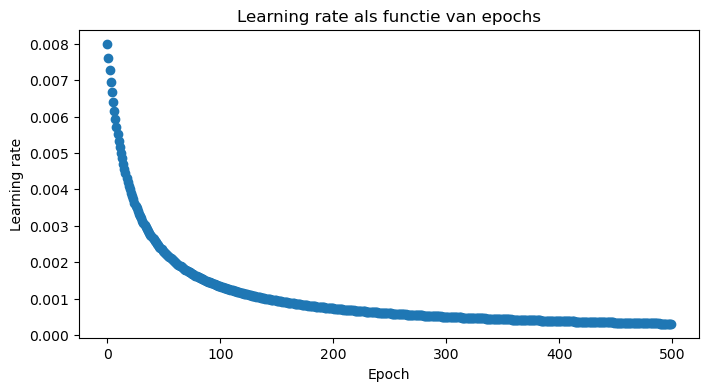


Definieer AutoEncoder Neuraal netwerk
Epoch 1/500
34/34 [==============================] - 5s 134ms/step - loss: 0.2067 - mse: 0.0430 - mae: 0.0954 - mape: 46605772.0000 - accuracy: 6.1341e-05 - val_loss: 0.1853 - val_mse: 0.0343 - val_mae: 0.0926 - val_mape: 52475916.0000 - val_accuracy: 0.0000e+00 - lr: 0.0080
Epoch 2/500
34/34 [==============================] - 4s 127ms/step - loss: 0.1726 - mse: 0.0298 - mae: 0.0818 - mape: 46476040.0000 - accuracy: 1.8402e-04 - val_loss: 0.1616 - val_mse: 0.0261 - val_mae: 0.0767 - val_mape: 44306760.0000 - val_accuracy: 0.0000e+00 - lr: 0.0076
Epoch 3/500
34/34 [==============================] - 4s 128ms/step - loss: 0.1567 - mse: 0.0246 - mae: 0.0718 - mape: 41333132.0000 - accuracy: 0.0017 - val_loss: 0.1540 - val_mse: 0.0237 - val_mae: 0.0690 - val_mape: 38904936.0000 - val_accuracy: 0.0082 - lr: 0.0073
Epoch 4/500
34/34 [==============================] - 4s 126ms/step - loss: 0.1495 - mse: 0.0224 - mae: 0.0679 - mape: 39841936.0000 - accurac

34/34 [==============================] - 4s 125ms/step - loss: 0.0795 - mse: 0.0063 - mae: 0.0356 - mape: 24770964.0000 - accuracy: 0.1819 - val_loss: 0.0809 - val_mse: 0.0065 - val_mae: 0.0382 - val_mape: 25902714.0000 - val_accuracy: 0.2337 - lr: 0.0032
Epoch 32/500
34/34 [==============================] - 4s 126ms/step - loss: 0.0787 - mse: 0.0062 - mae: 0.0355 - mape: 24854996.0000 - accuracy: 0.1661 - val_loss: 0.0779 - val_mse: 0.0061 - val_mae: 0.0342 - val_mape: 23607386.0000 - val_accuracy: 0.1900 - lr: 0.0031
Epoch 33/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0774 - mse: 0.0060 - mae: 0.0345 - mape: 24112158.0000 - accuracy: 0.1850 - val_loss: 0.0761 - val_mse: 0.0058 - val_mae: 0.0338 - val_mape: 23376368.0000 - val_accuracy: 0.1505 - lr: 0.0031
Epoch 34/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0757 - mse: 0.0057 - mae: 0.0344 - mape: 24190678.0000 - accuracy: 0.1599 - val_loss: 0.0736 - val_mse: 0.0054 - val_mae: 0.0328

34/34 [==============================] - 4s 125ms/step - loss: 0.0555 - mse: 0.0031 - mae: 0.0243 - mape: 17787286.0000 - accuracy: 0.1897 - val_loss: 0.0554 - val_mse: 0.0031 - val_mae: 0.0247 - val_mape: 18349142.0000 - val_accuracy: 0.2029 - lr: 0.0020
Epoch 62/500
34/34 [==============================] - 4s 126ms/step - loss: 0.0555 - mse: 0.0031 - mae: 0.0246 - mape: 17720668.0000 - accuracy: 0.2176 - val_loss: 0.0560 - val_mse: 0.0031 - val_mae: 0.0251 - val_mape: 18086810.0000 - val_accuracy: 0.2340 - lr: 0.0020
Epoch 63/500
34/34 [==============================] - 4s 126ms/step - loss: 0.0546 - mse: 0.0030 - mae: 0.0244 - mape: 17972250.0000 - accuracy: 0.2036 - val_loss: 0.0550 - val_mse: 0.0030 - val_mae: 0.0243 - val_mape: 17372768.0000 - val_accuracy: 0.1785 - lr: 0.0020
Epoch 64/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0545 - mse: 0.0030 - mae: 0.0241 - mape: 17581164.0000 - accuracy: 0.1996 - val_loss: 0.0537 - val_mse: 0.0029 - val_mae: 0.0242

34/34 [==============================] - 4s 125ms/step - loss: 0.0445 - mse: 0.0020 - mae: 0.0195 - mape: 14867691.0000 - accuracy: 0.1987 - val_loss: 0.0445 - val_mse: 0.0020 - val_mae: 0.0195 - val_mape: 14795215.0000 - val_accuracy: 0.2136 - lr: 0.0015
Epoch 92/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0447 - mse: 0.0020 - mae: 0.0197 - mape: 14790101.0000 - accuracy: 0.1813 - val_loss: 0.0440 - val_mse: 0.0019 - val_mae: 0.0186 - val_mape: 13705840.0000 - val_accuracy: 0.1519 - lr: 0.0014
Epoch 93/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0441 - mse: 0.0019 - mae: 0.0191 - mape: 14308416.0000 - accuracy: 0.2152 - val_loss: 0.0441 - val_mse: 0.0019 - val_mae: 0.0197 - val_mape: 14969864.0000 - val_accuracy: 0.1493 - lr: 0.0014
Epoch 94/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0438 - mse: 0.0019 - mae: 0.0195 - mape: 14753778.0000 - accuracy: 0.1726 - val_loss: 0.0439 - val_mse: 0.0019 - val_mae: 0.0194

34/34 [==============================] - 4s 127ms/step - loss: 0.0391 - mse: 0.0015 - mae: 0.0160 - mape: 12207124.0000 - accuracy: 0.2132 - val_loss: 0.0394 - val_mse: 0.0016 - val_mae: 0.0164 - val_mape: 12390432.0000 - val_accuracy: 0.2098 - lr: 0.0011
Epoch 122/500
34/34 [==============================] - 4s 127ms/step - loss: 0.0391 - mse: 0.0015 - mae: 0.0161 - mape: 12116360.0000 - accuracy: 0.2096 - val_loss: 0.0390 - val_mse: 0.0015 - val_mae: 0.0159 - val_mape: 12025647.0000 - val_accuracy: 0.1801 - lr: 0.0011
Epoch 123/500
34/34 [==============================] - 4s 126ms/step - loss: 0.0389 - mse: 0.0015 - mae: 0.0159 - mape: 12013341.0000 - accuracy: 0.2046 - val_loss: 0.0389 - val_mse: 0.0015 - val_mae: 0.0157 - val_mape: 11961291.0000 - val_accuracy: 0.2905 - lr: 0.0011
Epoch 124/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0390 - mse: 0.0015 - mae: 0.0159 - mape: 12049385.0000 - accuracy: 0.1849 - val_loss: 0.0390 - val_mse: 0.0015 - val_mae: 0.0

34/34 [==============================] - 4s 124ms/step - loss: 0.0364 - mse: 0.0013 - mae: 0.0150 - mape: 11415816.0000 - accuracy: 0.2023 - val_loss: 0.0363 - val_mse: 0.0013 - val_mae: 0.0149 - val_mape: 11413399.0000 - val_accuracy: 0.2983 - lr: 9.4118e-04
Epoch 152/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0360 - mse: 0.0013 - mae: 0.0146 - mape: 11145971.0000 - accuracy: 0.2306 - val_loss: 0.0360 - val_mse: 0.0013 - val_mae: 0.0145 - val_mape: 11026558.0000 - val_accuracy: 0.2121 - lr: 9.3567e-04
Epoch 153/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0360 - mse: 0.0013 - mae: 0.0146 - mape: 11098888.0000 - accuracy: 0.1920 - val_loss: 0.0362 - val_mse: 0.0013 - val_mae: 0.0149 - val_mape: 11356641.0000 - val_accuracy: 0.1910 - lr: 9.3023e-04
Epoch 154/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0360 - mse: 0.0013 - mae: 0.0147 - mape: 11216184.0000 - accuracy: 0.1759 - val_loss: 0.0360 - val_mse: 0.0013 - 

Epoch 181/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0339 - mse: 0.0011 - mae: 0.0133 - mape: 10190629.0000 - accuracy: 0.2081 - val_loss: 0.0339 - val_mse: 0.0011 - val_mae: 0.0133 - val_mape: 10191178.0000 - val_accuracy: 0.1983 - lr: 8.0000e-04
Epoch 182/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0339 - mse: 0.0012 - mae: 0.0133 - mape: 10089133.0000 - accuracy: 0.2098 - val_loss: 0.0338 - val_mse: 0.0011 - val_mae: 0.0131 - val_mape: 9939990.0000 - val_accuracy: 0.1749 - lr: 7.9602e-04
Epoch 183/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0338 - mse: 0.0011 - mae: 0.0131 - mape: 9960802.0000 - accuracy: 0.1794 - val_loss: 0.0340 - val_mse: 0.0012 - val_mae: 0.0134 - val_mape: 10143286.0000 - val_accuracy: 0.0967 - lr: 7.9208e-04
Epoch 184/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0338 - mse: 0.0011 - mae: 0.0131 - mape: 10001307.0000 - accuracy: 0.1786 - val_loss: 0.0334 - val_ms

34/34 [==============================] - 4s 124ms/step - loss: 0.0326 - mse: 0.0011 - mae: 0.0123 - mape: 9407686.0000 - accuracy: 0.1689 - val_loss: 0.0324 - val_mse: 0.0010 - val_mae: 0.0119 - val_mape: 9138336.0000 - val_accuracy: 0.1196 - lr: 6.9565e-04
Epoch 212/500
34/34 [==============================] - 4s 123ms/step - loss: 0.0326 - mse: 0.0011 - mae: 0.0123 - mape: 9414768.0000 - accuracy: 0.1619 - val_loss: 0.0324 - val_mse: 0.0010 - val_mae: 0.0120 - val_mape: 9214460.0000 - val_accuracy: 0.1135 - lr: 6.9264e-04
Epoch 213/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0325 - mse: 0.0011 - mae: 0.0121 - mape: 9256984.0000 - accuracy: 0.1703 - val_loss: 0.0325 - val_mse: 0.0011 - val_mae: 0.0122 - val_mape: 9346992.0000 - val_accuracy: 0.1648 - lr: 6.8966e-04
Epoch 214/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0325 - mse: 0.0011 - mae: 0.0122 - mape: 9358912.0000 - accuracy: 0.2262 - val_loss: 0.0323 - val_mse: 0.0010 - val_mae

34/34 [==============================] - 4s 125ms/step - loss: 0.0317 - mse: 0.0010 - mae: 0.0117 - mape: 8909116.0000 - accuracy: 0.2036 - val_loss: 0.0315 - val_mse: 9.9434e-04 - val_mae: 0.0114 - val_mape: 8689415.0000 - val_accuracy: 0.1953 - lr: 6.1538e-04
Epoch 242/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0317 - mse: 0.0010 - mae: 0.0115 - mape: 8812231.0000 - accuracy: 0.1832 - val_loss: 0.0318 - val_mse: 0.0010 - val_mae: 0.0118 - val_mape: 9030000.0000 - val_accuracy: 0.2271 - lr: 6.1303e-04
Epoch 243/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0317 - mse: 0.0010 - mae: 0.0116 - mape: 8881670.0000 - accuracy: 0.1903 - val_loss: 0.0316 - val_mse: 0.0010 - val_mae: 0.0116 - val_mape: 8924755.0000 - val_accuracy: 0.2051 - lr: 6.1069e-04
Epoch 244/500
34/34 [==============================] - 4s 128ms/step - loss: 0.0317 - mse: 0.0010 - mae: 0.0116 - mape: 8887113.0000 - accuracy: 0.1767 - val_loss: 0.0316 - val_mse: 9.9897e-04 -

34/34 [==============================] - 4s 125ms/step - loss: 0.0311 - mse: 9.6524e-04 - mae: 0.0109 - mape: 8399624.0000 - accuracy: 0.1857 - val_loss: 0.0312 - val_mse: 9.7319e-04 - val_mae: 0.0114 - val_mape: 8758033.0000 - val_accuracy: 0.2024 - lr: 5.5363e-04
Epoch 271/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0311 - mse: 9.6733e-04 - mae: 0.0111 - mape: 8493727.0000 - accuracy: 0.1752 - val_loss: 0.0310 - val_mse: 9.6018e-04 - val_mae: 0.0110 - val_mape: 8454026.0000 - val_accuracy: 0.1890 - lr: 5.5172e-04
Epoch 272/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0312 - mse: 9.7055e-04 - mae: 0.0111 - mape: 8533957.0000 - accuracy: 0.2252 - val_loss: 0.0311 - val_mse: 9.6901e-04 - val_mae: 0.0112 - val_mape: 8484349.0000 - val_accuracy: 0.2163 - lr: 5.4983e-04
Epoch 273/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0311 - mse: 9.6700e-04 - mae: 0.0110 - mape: 8388406.5000 - accuracy: 0.1745 - val_loss: 0.0309

34/34 [==============================] - 4s 124ms/step - loss: 0.0307 - mse: 9.4111e-04 - mae: 0.0107 - mape: 8159087.0000 - accuracy: 0.2087 - val_loss: 0.0307 - val_mse: 9.3957e-04 - val_mae: 0.0108 - val_mape: 8185274.0000 - val_accuracy: 0.2668 - lr: 5.0314e-04
Epoch 300/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0307 - mse: 9.3956e-04 - mae: 0.0106 - mape: 8103044.5000 - accuracy: 0.2163 - val_loss: 0.0306 - val_mse: 9.3530e-04 - val_mae: 0.0107 - val_mape: 8144815.0000 - val_accuracy: 0.1922 - lr: 5.0157e-04
Epoch 301/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0306 - mse: 9.3899e-04 - mae: 0.0106 - mape: 8155232.5000 - accuracy: 0.1901 - val_loss: 0.0306 - val_mse: 9.3397e-04 - val_mae: 0.0106 - val_mape: 8133876.5000 - val_accuracy: 0.2014 - lr: 5.0000e-04
Epoch 302/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0307 - mse: 9.4219e-04 - mae: 0.0107 - mape: 8211942.0000 - accuracy: 0.1585 - val_loss: 0.0307

34/34 [==============================] - 4s 124ms/step - loss: 0.0304 - mse: 9.2476e-04 - mae: 0.0105 - mape: 7998172.0000 - accuracy: 0.1716 - val_loss: 0.0303 - val_mse: 9.1727e-04 - val_mae: 0.0104 - val_mape: 7949565.5000 - val_accuracy: 0.2625 - lr: 4.6110e-04
Epoch 329/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0303 - mse: 9.2046e-04 - mae: 0.0104 - mape: 7953361.5000 - accuracy: 0.2283 - val_loss: 0.0303 - val_mse: 9.1831e-04 - val_mae: 0.0105 - val_mape: 8046920.5000 - val_accuracy: 0.2802 - lr: 4.5977e-04
Epoch 330/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0303 - mse: 9.1932e-04 - mae: 0.0104 - mape: 7959846.5000 - accuracy: 0.2271 - val_loss: 0.0303 - val_mse: 9.1784e-04 - val_mae: 0.0105 - val_mape: 8057043.5000 - val_accuracy: 0.2086 - lr: 4.5845e-04
Epoch 331/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0303 - mse: 9.1958e-04 - mae: 0.0104 - mape: 7978541.0000 - accuracy: 0.2209 - val_loss: 0.0302

34/34 [==============================] - 4s 125ms/step - loss: 0.0301 - mse: 9.0420e-04 - mae: 0.0101 - mape: 7749478.5000 - accuracy: 0.2109 - val_loss: 0.0300 - val_mse: 9.0150e-04 - val_mae: 0.0102 - val_mape: 7844472.0000 - val_accuracy: 0.2345 - lr: 4.2553e-04
Epoch 358/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0301 - mse: 9.0416e-04 - mae: 0.0102 - mape: 7785686.0000 - accuracy: 0.2321 - val_loss: 0.0300 - val_mse: 9.0109e-04 - val_mae: 0.0102 - val_mape: 7819153.5000 - val_accuracy: 0.2015 - lr: 4.2440e-04
Epoch 359/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0300 - mse: 9.0279e-04 - mae: 0.0101 - mape: 7754649.0000 - accuracy: 0.2280 - val_loss: 0.0300 - val_mse: 8.9810e-04 - val_mae: 0.0101 - val_mape: 7733317.0000 - val_accuracy: 0.1725 - lr: 4.2328e-04
Epoch 360/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0301 - mse: 9.0420e-04 - mae: 0.0102 - mape: 7814869.5000 - accuracy: 0.2040 - val_loss: 0.0301

34/34 [==============================] - 4s 124ms/step - loss: 0.0299 - mse: 8.9180e-04 - mae: 0.0100 - mape: 7646642.0000 - accuracy: 0.1881 - val_loss: 0.0298 - val_mse: 8.8623e-04 - val_mae: 0.0099 - val_mape: 7584668.0000 - val_accuracy: 0.2427 - lr: 3.9506e-04
Epoch 387/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0299 - mse: 8.9170e-04 - mae: 0.0100 - mape: 7661705.5000 - accuracy: 0.2129 - val_loss: 0.0298 - val_mse: 8.8771e-04 - val_mae: 0.0100 - val_mape: 7674591.5000 - val_accuracy: 0.2374 - lr: 3.9409e-04
Epoch 388/500
34/34 [==============================] - 4s 125ms/step - loss: 0.0298 - mse: 8.8829e-04 - mae: 0.0099 - mape: 7571455.0000 - accuracy: 0.2321 - val_loss: 0.0297 - val_mse: 8.8428e-04 - val_mae: 0.0099 - val_mape: 7557225.5000 - val_accuracy: 0.2404 - lr: 3.9312e-04
Epoch 389/500
34/34 [==============================] - 4s 123ms/step - loss: 0.0298 - mse: 8.8770e-04 - mae: 0.0099 - mape: 7579715.5000 - accuracy: 0.2437 - val_loss: 0.0298

34/34 [==============================] - 4s 124ms/step - loss: 0.0296 - mse: 8.7766e-04 - mae: 0.0098 - mape: 7543299.0000 - accuracy: 0.2412 - val_loss: 0.0296 - val_mse: 8.7339e-04 - val_mae: 0.0098 - val_mape: 7522456.0000 - val_accuracy: 0.2602 - lr: 3.6866e-04
Epoch 416/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0297 - mse: 8.8068e-04 - mae: 0.0100 - mape: 7641893.5000 - accuracy: 0.1905 - val_loss: 0.0296 - val_mse: 8.7704e-04 - val_mae: 0.0100 - val_mape: 7647755.5000 - val_accuracy: 0.1403 - lr: 3.6782e-04
Epoch 417/500
34/34 [==============================] - 4s 123ms/step - loss: 0.0296 - mse: 8.7866e-04 - mae: 0.0099 - mape: 7571694.0000 - accuracy: 0.1964 - val_loss: 0.0295 - val_mse: 8.7258e-04 - val_mae: 0.0098 - val_mape: 7483796.0000 - val_accuracy: 0.1996 - lr: 3.6697e-04
Epoch 418/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0296 - mse: 8.7726e-04 - mae: 0.0098 - mape: 7528452.5000 - accuracy: 0.2323 - val_loss: 0.0296

34/34 [==============================] - 4s 124ms/step - loss: 0.0295 - mse: 8.6754e-04 - mae: 0.0098 - mape: 7525933.0000 - accuracy: 0.2029 - val_loss: 0.0294 - val_mse: 8.6306e-04 - val_mae: 0.0098 - val_mape: 7505050.5000 - val_accuracy: 0.2354 - lr: 3.4557e-04
Epoch 445/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0294 - mse: 8.6569e-04 - mae: 0.0097 - mape: 7442140.0000 - accuracy: 0.2267 - val_loss: 0.0294 - val_mse: 8.6295e-04 - val_mae: 0.0097 - val_mape: 7469725.5000 - val_accuracy: 0.2719 - lr: 3.4483e-04
Epoch 446/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0295 - mse: 8.7154e-04 - mae: 0.0099 - mape: 7579372.5000 - accuracy: 0.1900 - val_loss: 0.0294 - val_mse: 8.6521e-04 - val_mae: 0.0098 - val_mape: 7458396.5000 - val_accuracy: 0.2293 - lr: 3.4409e-04
Epoch 447/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0294 - mse: 8.6509e-04 - mae: 0.0096 - mape: 7386356.5000 - accuracy: 0.2141 - val_loss: 0.0293

34/34 [==============================] - 4s 124ms/step - loss: 0.0292 - mse: 8.4990e-04 - mae: 0.0096 - mape: 7323588.0000 - accuracy: 0.2284 - val_loss: 0.0291 - val_mse: 8.4703e-04 - val_mae: 0.0096 - val_mape: 7337046.0000 - val_accuracy: 0.2534 - lr: 3.2520e-04
Epoch 474/500
34/34 [==============================] - 4s 123ms/step - loss: 0.0291 - mse: 8.4792e-04 - mae: 0.0095 - mape: 7270383.5000 - accuracy: 0.2389 - val_loss: 0.0291 - val_mse: 8.4462e-04 - val_mae: 0.0095 - val_mape: 7286129.0000 - val_accuracy: 0.2344 - lr: 3.2454e-04
Epoch 475/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0291 - mse: 8.4831e-04 - mae: 0.0095 - mape: 7308455.5000 - accuracy: 0.2153 - val_loss: 0.0291 - val_mse: 8.4539e-04 - val_mae: 0.0095 - val_mape: 7316486.0000 - val_accuracy: 0.2265 - lr: 3.2389e-04
Epoch 476/500
34/34 [==============================] - 4s 124ms/step - loss: 0.0292 - mse: 8.5056e-04 - mae: 0.0096 - mape: 7347095.5000 - accuracy: 0.2215 - val_loss: 0.0291

                                                                 
 dense_134 (Dense)           (None, 65)                6890      
                                                                 
 activation_134 (Activation)  (None, 65)               0         
                                                                 
 dense_135 (Dense)           (None, 28)                1848      
                                                                 
 activation_135 (Activation)  (None, 28)               0         
                                                                 
 dense_136 (Dense)           (None, 16)                464       
                                                                 
 activation_136 (Activation)  (None, 16)               0         
                                                                 
 dense_137 (Dense)           (None, 28)                476       
                                                                 
 activatio

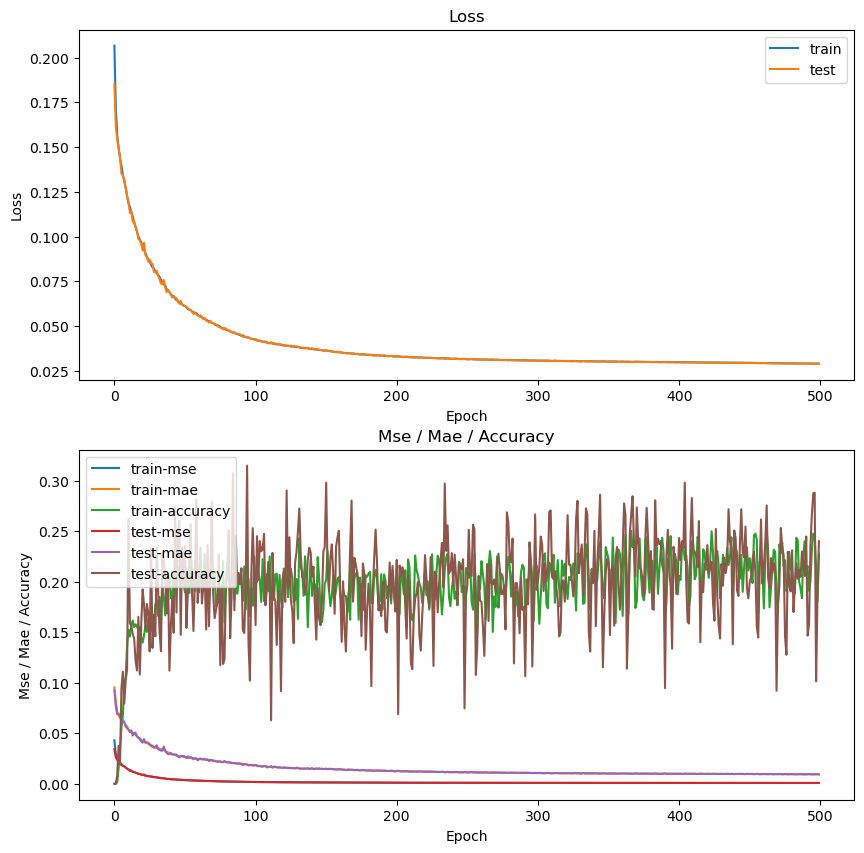

dict_keys(['loss', 'mse', 'mae', 'mape', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_accuracy', 'lr'])


In [21]:
# Voer neuraal netwerk uit   
# https://www.deeplearning.ai/ai-notes/initialization/
# loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0107 - val_accuracy: 0.9924
# NeuralNetworkModel("relu", 64, 32, 16, 8, 140, 0.0001, 0)
#
# OVERFITTING VOORKOMEN
# Activity Regularization: Penalize the model during training base on the magnitude of the activations.
# Weight Constraint: Constrain the magnitude of weights to be within a range or below a limit.
# Dropout: Probabilistically remove inputs during training.
# Noise: Add statistical noise to inputs during training.
# Early Stopping: Monitor model performance on a validation set and stop training when performance degrades.

# Veranderende learning rate instellen via een callback functie in Keras
# Ook wordt er een plot gemaakt van de learning rate
# https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/
# https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
# lr_callback_1 = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", patience = 2, mode = "auto", min_delta = 0.01, cooldown = 0, min_lr = 0)
# tensorboard_callback_1 = tf.keras.callbacks.TensorBoard(log_dir = "data", histogram_freq = 1)
# modelckpt_callback_1 = tf.keras.callbacks.ModelCheckpoint(
#    monitor = "val_accuracy",
#    filepath = "data",
#    verbose = 1,
#    mode = "max",
#    save_weights_only = False,
#    save_best_only = True,
#    save_freq = "epoch"
#    )

import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from sklearn.utils import compute_class_weight
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from keras.layers import LeakyReLU

with tf.device("cpu:0"):

    # Define the Required Callback Functions
    def exp_decay(epoch):
        #lrate = learning_rate * np.exp(-decay_rate*float(epoch))          #exponentieel
        lrate = learning_rate * 1/(1 + decay_rate * epoch)                #assymptoot naar 0
        #lrate = (((0.002-learning_rate)/epochs) * epoch) + learning_rate   #lineair naar 0
        return lrate

    lr_rate = LearningRateScheduler(exp_decay)

    class StopTraining(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            # if(logs.get('accuracy')>0.99) or (logs.get('val_loss')<0.001):
            if (logs.get('val_loss')<0.001):
                print("\n99% val_accuracy bereikt, dus algorithme stopt met trainen")
                self.model.stop_training = True
            
   
    # een grafiek maken van de learning rate\
    x = list(range(0,epochs))
    y = []
    for i in x: y.append(exp_decay(i))
    fig, axs = plt.subplots(figsize=(8, 4))
    axs.scatter(x, y)
    axs.set_title('Learning rate als functie van epochs')
    axs.set(xlabel='Epoch', ylabel='Learning rate')
    plt.show() 

    # Autoencoder
    print("\nDefinieer AutoEncoder Neuraal netwerk")

    reset_random_seeds()
    if 1==2:
        NNmodel = tf.keras.models.Sequential() 
        NNmodel.add(tf.keras.Input(shape=(InnerLayer1,)))
        if InnerLayer2>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer2, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer3>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer3, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer4>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer4, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer5>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer5, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer6>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer6, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer7>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer7, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        NNmodel.add(tf.keras.layers.Dense(units=LatentLayer, activation="relu", kernel_regularizer=l2(Reg)))
        if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer7>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer7, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer6>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer6, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer5>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer5, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer4>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer4, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer3>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer3, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        if InnerLayer2>0:
            NNmodel.add(tf.keras.layers.Dense(units=InnerLayer2, activation="relu", kernel_regularizer=l2(Reg)))
            if DropoutVal>0: NNmodel.add(Dropout(DropoutVal))
        NNmodel.add(tf.keras.layers.Dense(units=InnerLayer1, activation="linear", kernel_regularizer=l2(Reg)))
        opt = Nadam(learning_rate=0.01, epsilon=1e-07)
        NNmodel.compile(optimizer=opt, loss=root_mean_squared_error, metrics=['mse', 'mae', 'mape', 'accuracy'])    
        print(NNmodel.summary())
    else:
        NNmodel = NeuralNetworkModel("relu", InnerLayer1, InnerLayer2, InnerLayer3, LatentLayer, 0, 0, 0.01, 2)

    # learning schedule callback
    callbacks_list = [lr_rate, StopTraining()]

    # hist = NNmodel.fit(x_train, x_train, batch_size=8192, epochs=20, validation_data=(x_test, x_test), callbacks = [StopTraining(), lr_callback_1, tensorboard_callback_1, modelckpt_callback_1], max_queue_size = 20, use_multiprocessing = True, workers = 24, verbose=1)
    hist = NNmodel.fit(x_train, x_train, batch_size=bSize, epochs=epochs, validation_data=(x_test, x_test), callbacks=callbacks_list, verbose=1)
    print(NNmodel.summary())
    
    # plot the autoencoder
    plot_model(NNmodel, 'data/autoencoder.png', show_shapes=True)    

    x_pred = NNmodel.predict(x_test)

    # plot loss and accuracy during training
    fig, axs = plt.subplots(2,1,figsize=(10, 10))
    axs[0].plot(hist.history['loss'], label='train')
    axs[0].plot(hist.history['val_loss'], label='test')
    axs[0].set_title('Loss')
    axs[0].set(xlabel='Epoch', ylabel='Loss')
    axs[0].legend()

    axs[1].plot(hist.history['mse'], label='train-mse')
    axs[1].plot(hist.history['mae'], label='train-mae')
    axs[1].plot(hist.history['accuracy'], label='train-accuracy')
    axs[1].plot(hist.history['val_mse'], label='test-mse')
    axs[1].plot(hist.history['val_mae'], label='test-mae')
    axs[1].plot(hist.history['val_accuracy'], label='test-accuracy')
    axs[1].set_title('Mse / Mae / Accuracy')
    axs[1].set(xlabel='Epoch', ylabel='Mse / Mae / Accuracy')
    axs[1].legend()
    plt.show() 
    
    # save the weights of the model to file
    NNmodel.save('data/encoder.h5')
    
    print(hist.history.keys())

In [22]:
import scipy
# Epoch 199/200
# 34/34 [==============================] - 2s 45ms/step - loss: 0.0883 - mse: 0.0078 - mae: 0.0317 - mape: 19608284.0000 - 
# accuracy: 0.2064 - 
# val_loss: 0.0887 - val_mse: 0.0079 - val_mae: 0.0321 - val_mape: 19836852.0000 - val_accuracy: 0.1931 - lr: 9.1324e-04

print(list(hist.history['mse'])[-1])
print(list(hist.history['val_mse'])[-1])
print(list(hist.history['mae'])[-1])
print(list(hist.history['val_mae'])[-1])
print(list(hist.history['accuracy'])[-1])
print(list(hist.history['val_accuracy'])[-1])
print(list(hist.history['mape'])[-1])
print(list(hist.history['val_mape'])[-1])
print(list(hist.history['loss'])[-1])
print(list(hist.history['val_loss'])[-1])
print(list(hist.history['lr'])[-1])
print("\n")

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(1,10), list(hist.history['loss'])[-9:])
print("Slope: " + str(slope))

# Calculate Eucledian Distance
m = np.sqrt(np.sum(np.square(np.subtract(x_pred, x_test)), axis=1))
count = np.count_nonzero(m < 1)
print(str(len(x_test)) + " : " + str(count))

from sklearn.metrics import r2_score
r2 = r2_score(x_test, x_pred)
print(r2)


0.0008373017190024257
0.0008331119897775352
0.009339017793536186
0.009310220368206501
0.22774049639701843
0.2402130365371704
7171775.0
7134883.5
0.028935011476278305
0.028863416984677315
0.00030828518


Slope: -6.703504671653112e-06
61587 : 61277
0.8698565417286949


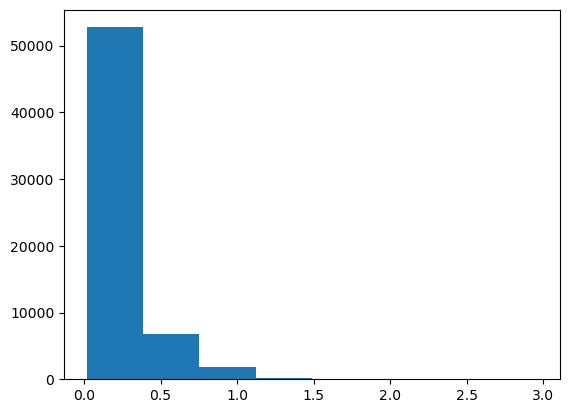

In [23]:
NoBins = 8
pdm=pd.DataFrame(m)
plt.hist(pdm[pdm[0]<NoBins], bins=NoBins)
plt.show()

Dimensie van de X-training: (554280, 105) <class 'numpy.ndarray'>
Dimensie van de X-test: (61587, 105) <class 'numpy.ndarray'>

Optimalisatie beste Neurale Netwerk: aantal nodes per layer en met kFold)

Parameters bij onderstaande resultaten
LearningRate:0.0  Param2:65  LatentLayer:13  DevSet:0.025  Reg:0.0  Opt:2  Batchsize:16384  Epochs:50
1925/1925 [==============================] - 1s 542us/step
Loss: 0.07431074976921082  Loss test-set: 0.07396689057350159

Parameters bij onderstaande resultaten
LearningRate:0.0  Param2:65  LatentLayer:14  DevSet:0.025  Reg:0.0  Opt:2  Batchsize:16384  Epochs:50
1925/1925 [==============================] - 1s 530us/step
Loss: 0.06653858721256256  Loss test-set: 0.0659293606877327

Parameters bij onderstaande resultaten
LearningRate:0.0  Param2:65  LatentLayer:15  DevSet:0.025  Reg:0.0  Opt:2  Batchsize:16384  Epochs:50
1925/1925 [==============================] - 1s 629us/step
Loss: 0.06767721474170685  Loss test-set: 0.06743122637271881

Parameter

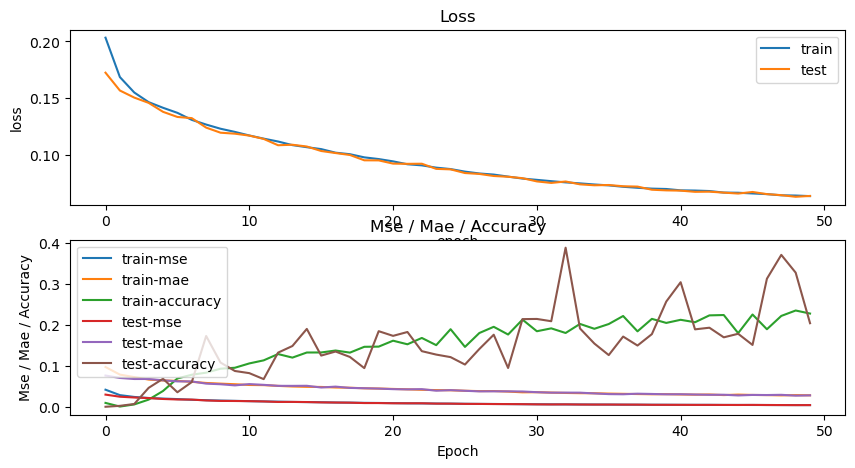

In [17]:
# Pas het neurale netwerk nogmaals toe, maar nu door de training en test data 
# steeds te splitsen mbv kFold
import os
from sklearn.model_selection import KFold
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

# https://stackoverflow.com/questions/39758094/clearing-tensorflow-gpu-memory-after-model-execution
from numba import cuda 
#InteractiveSession.close()

TF_CONFIG = ConfigProto()
TF_CONFIG.gpu_options.per_process_gpu_memory_fraction = 0.333
# TF_CONFIG = ConfigProto(gpu_options=GPUOptions(per_process_gpu_memory_fraction=0.1),allow_soft_placement=True)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))
#InteractiveSession.close(_self)
# df = x_train[["ClientId", "Periodenummer", "GedeclareerdeKostenExclBtw", "GemeenteId", "nProductID", "nAanbiederID", "EerdereDeclaraties"]]


if HyperparameterTuning == True:
    with tf.device("cpu:0"):
        print("Dimensie van de X-training: " + str(np.shape(x_train)) + " "+ str(type(x_train)))
        print("Dimensie van de X-test: " + str(np.shape(x_test)) + " "+ str(type(x_test)))

        print("\nOptimalisatie beste Neurale Netwerk: aantal nodes per layer en met kFold)")
        NNscores=[]
        ParamScores=[]
        ParamScores.append(["Cnt", "LatentLay", "Param2", "lRate", "DevSet", "Reg", "Opt", "bSize", "Epochs", "Count_train", "Count_test", "R2_train", "R2_test", "x_train", "x_test", "vmse", "vmsetest", "vmae", "vmaetest", "vacc", "vacctest", "vloss", "vlosstest", "vmape", "vmapetest", "Slope"])
        cnt = 0
        
        for LearnRate in range(0, 20, 20):
            #print("Optimalisatie Param 1; Learning Rate: " + str(float(LearnRate/100000)))
            lRate = LearnRate/100000
            for dSet in range(1, 2, 1):
                DevSet = dSet/40
                X_train, X_dev = train_test_split(x_train, test_size = DevSet, random_state = 42)
                for iReg in range(0,30,30):
                    Reg = iReg/100000
                    for Opt in range(2,3,1):
                        for Param2 in range(65,72,3):
                            bSize = 16*1024
                            for LatentLay in range(13,19,1):
                                #InteractiveSession.close(_self)
                                sess = InteractiveSession(config=TF_CONFIG)
                                reset_random_seeds()

                                # def NeuralNetworkModel(Activation, Param1, Param2, Param3, Param4, Reg, DropoutVal, lr, Optimizer):
                                NNmodel = NeuralNetworkModel("relu", InnerLayer1, Param2, InnerLayer3 ,LatentLay, Reg, 0, lRate, Opt)
                                cnt=cnt+1
                                NNscores.clear()
                                print("\nParameters bij onderstaande resultaten\nLearningRate:" + str(lRate) + "  Param2:" + str(Param2) + "  LatentLayer:" + str(LatentLay) + "  DevSet:" + str(DevSet) + "  Reg:" + str(Reg) + "  Opt:" + str(Opt) + "  Batchsize:" + str(bSize) + "  Epochs:" + str(epochs))

                                hist = NNmodel.fit(X_train, X_train, batch_size=bSize, epochs=epochs, validation_data=(x_test, x_test), callbacks=callbacks_list, verbose=0)

                                vmse = list(hist.history['mse'])[-1]
                                vmsetest = list(hist.history['val_mse'])[-1]
                                vmae = list(hist.history['mae'])[-1]
                                vmaetest = list(hist.history['val_mae'])[-1]
                                vacc = list(hist.history['accuracy'])[-1]
                                vacctest = list(hist.history['val_accuracy'])[-1]
                                vloss = list(hist.history['loss'])[-1]
                                vlosstest = list(hist.history['val_loss'])[-1]
                                vmape = list(hist.history['mape'])[-1]
                                vmapetest = list(hist.history['val_mape'])[-1]
                                vlr = list(hist.history['lr'])[-1]

                                xtrain_pred = NNmodel.predict(X_train)
                                xtest_pred = NNmodel.predict(x_test)

                                # Bepaal de R2 score op de training set en bepaals hoeveel records een EUCL DIST < 1 hebben
                                m_train = np.sqrt(np.sum(np.square(np.subtract(xtrain_pred, X_train)), axis=1))
                                count_train = np.count_nonzero(m_train < 1)/X_train.shape[0]
                                r2_train = r2_score(X_train, xtrain_pred)
                                
                                # Bepaal de R2 score op de test set en bepaals hoeveel records een EUCL DIST < 1 hebben
                                m_test = np.sqrt(np.sum(np.square(np.subtract(xtest_pred, x_test)), axis=1))
                                count_test = np.count_nonzero(m_test < 1)/x_test.shape[0]
                                r2_test = r2_score(x_test, xtest_pred)
                                
                                slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(1,10), list(hist.history['loss'])[-9:])

                                print ("Loss: " + str(vloss) + "  Loss test-set: " + str(vlosstest))
                                ParamScores.append([cnt, LatentLay, Param2, vlr, DevSet, Reg, Opt, bSize, epochs, count_train, count_test, r2_train, r2_test, X_train.shape, x_test.shape, vmse, vmsetest, vmae, vmaetest, vacc, vacctest, vloss, vlosstest, vmape, vmapetest, slope])

                                #device = cuda.get_current_device()
                                #device.reset()
                                sess.close()
                                #cuda.select_device(0)
                                #cuda.close()

    fig, axs = plt.subplots(2,1,figsize=(10, 5))
    axs[0].plot(hist.history['loss'], label='train')
    axs[0].plot(hist.history['val_loss'], label='test')
    axs[0].set_title('Loss')
    axs[0].set(xlabel='epoch', ylabel='loss')
    axs[0].legend()

    axs[1].plot(hist.history['mse'], label='train-mse')
    axs[1].plot(hist.history['mae'], label='train-mae')
    axs[1].plot(hist.history['accuracy'], label='train-accuracy')
    axs[1].plot(hist.history['val_mse'], label='test-mse')
    axs[1].plot(hist.history['val_mae'], label='test-mae')
    axs[1].plot(hist.history['val_accuracy'], label='test-accuracy')
    axs[1].set_title('Mse / Mae / Accuracy')
    axs[1].set(xlabel='Epoch', ylabel='Mse / Mae / Accuracy')
    axs[1].legend()
    plt.show() 


In [19]:
if HyperparameterTuning == True:
    df = pd.DataFrame(ParamScores)
    writer = pd.ExcelWriter('test_l2.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='testresults', index=False)
    writer.save()
    writer.close()


C:\Users\kvdte\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
